In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Overview

In [ ]:
df = pd.read_csv("C:\\Users\palak\Downloads\Salary Data.csv")

In [9]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 371
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  324 non-null    float64 
 1   Gender               324 non-null    object  
 2   Education Level      324 non-null    object  
 3   Job Title            324 non-null    object  
 4   Years of Experience  324 non-null    float64 
 5   Salary               324 non-null    float64 
 6   ExperienceGroup      321 non-null    category
 7   AgeGroup             324 non-null    category
dtypes: category(2), float64(3), object(3)
memory usage: 18.8+ KB


## Data Cleaning and preparation

In [96]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
ExperienceGroup        0
AgeGroup               0
dtype: int64

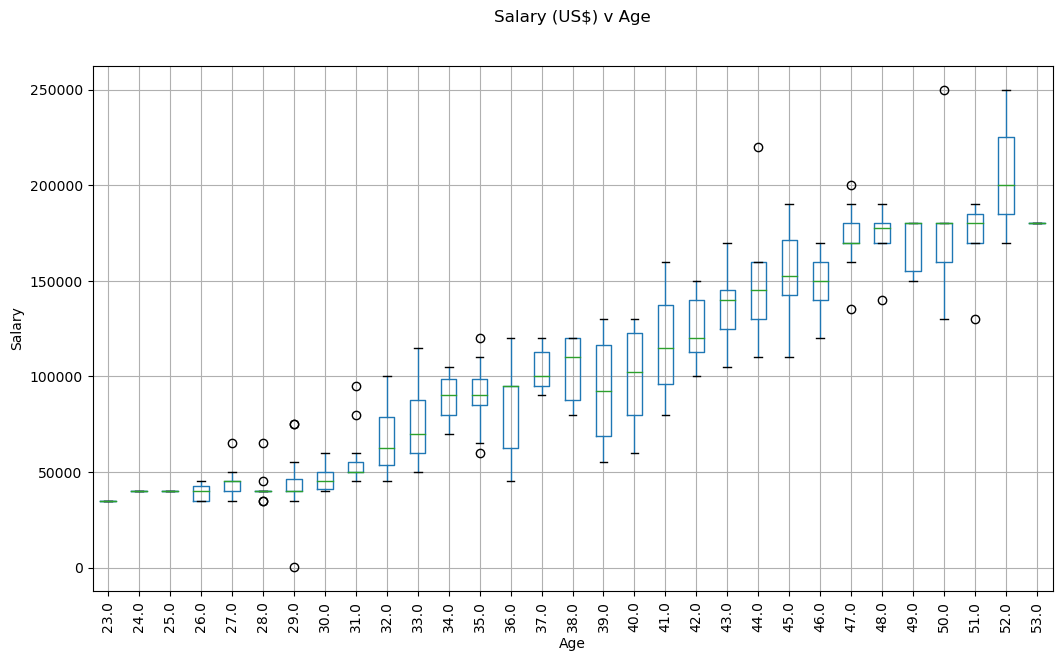

In [97]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Age', ax=ax)
plt.suptitle('Salary (US$) v Age')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

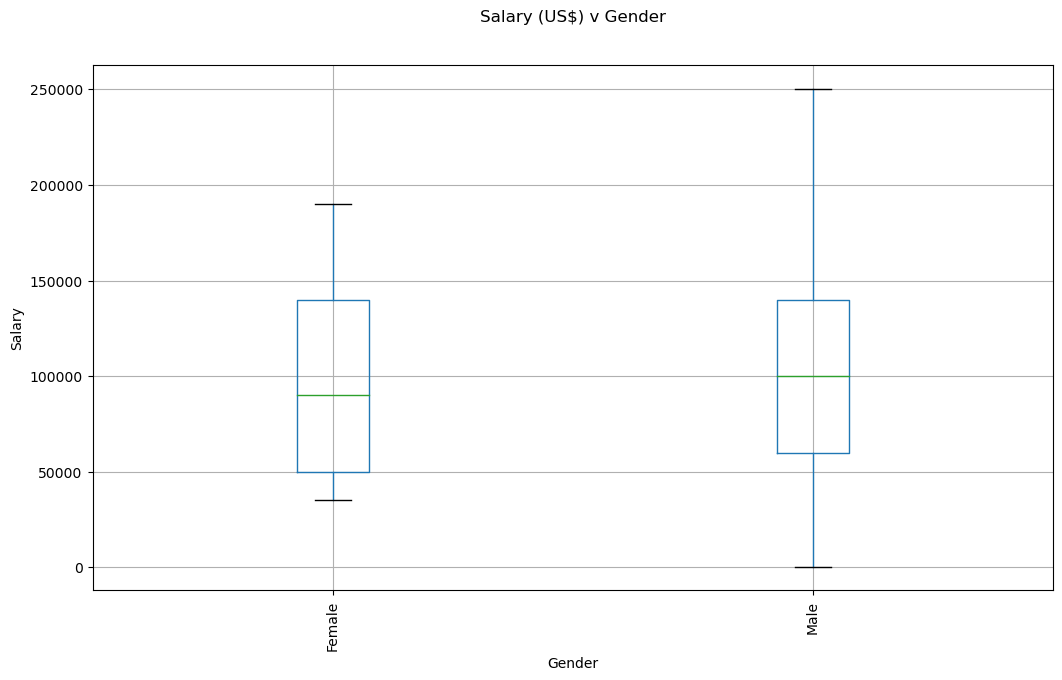

In [98]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Gender', ax=ax)
plt.suptitle('Salary (US$) v Gender')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

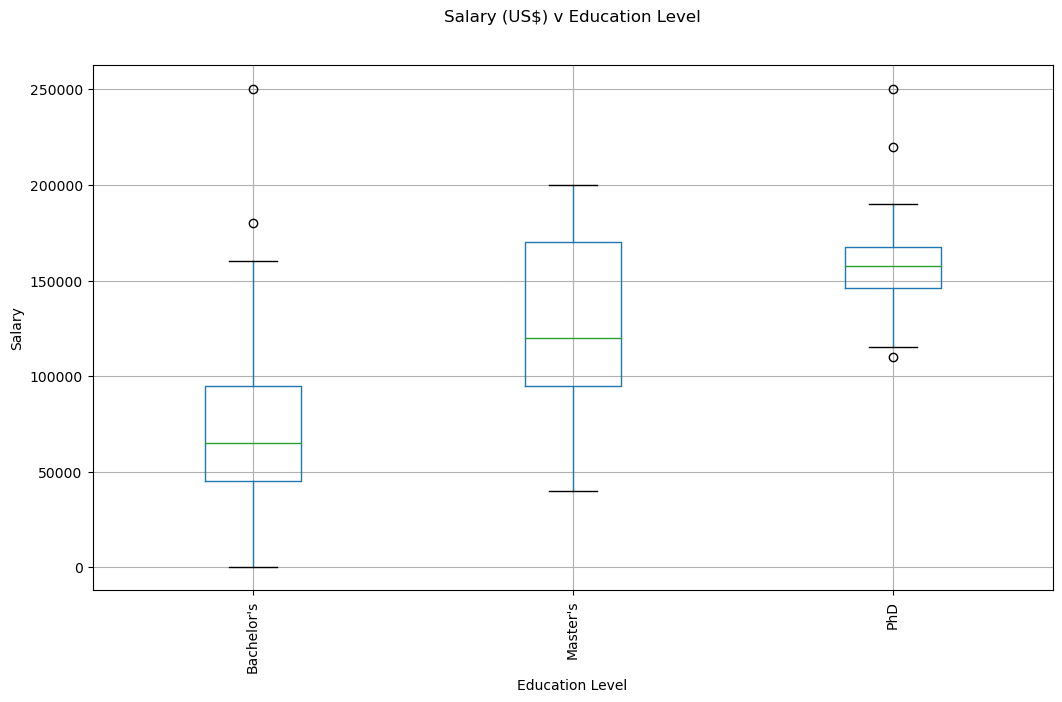

In [99]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Education Level', ax=ax)
plt.suptitle('Salary (US$) v Education Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

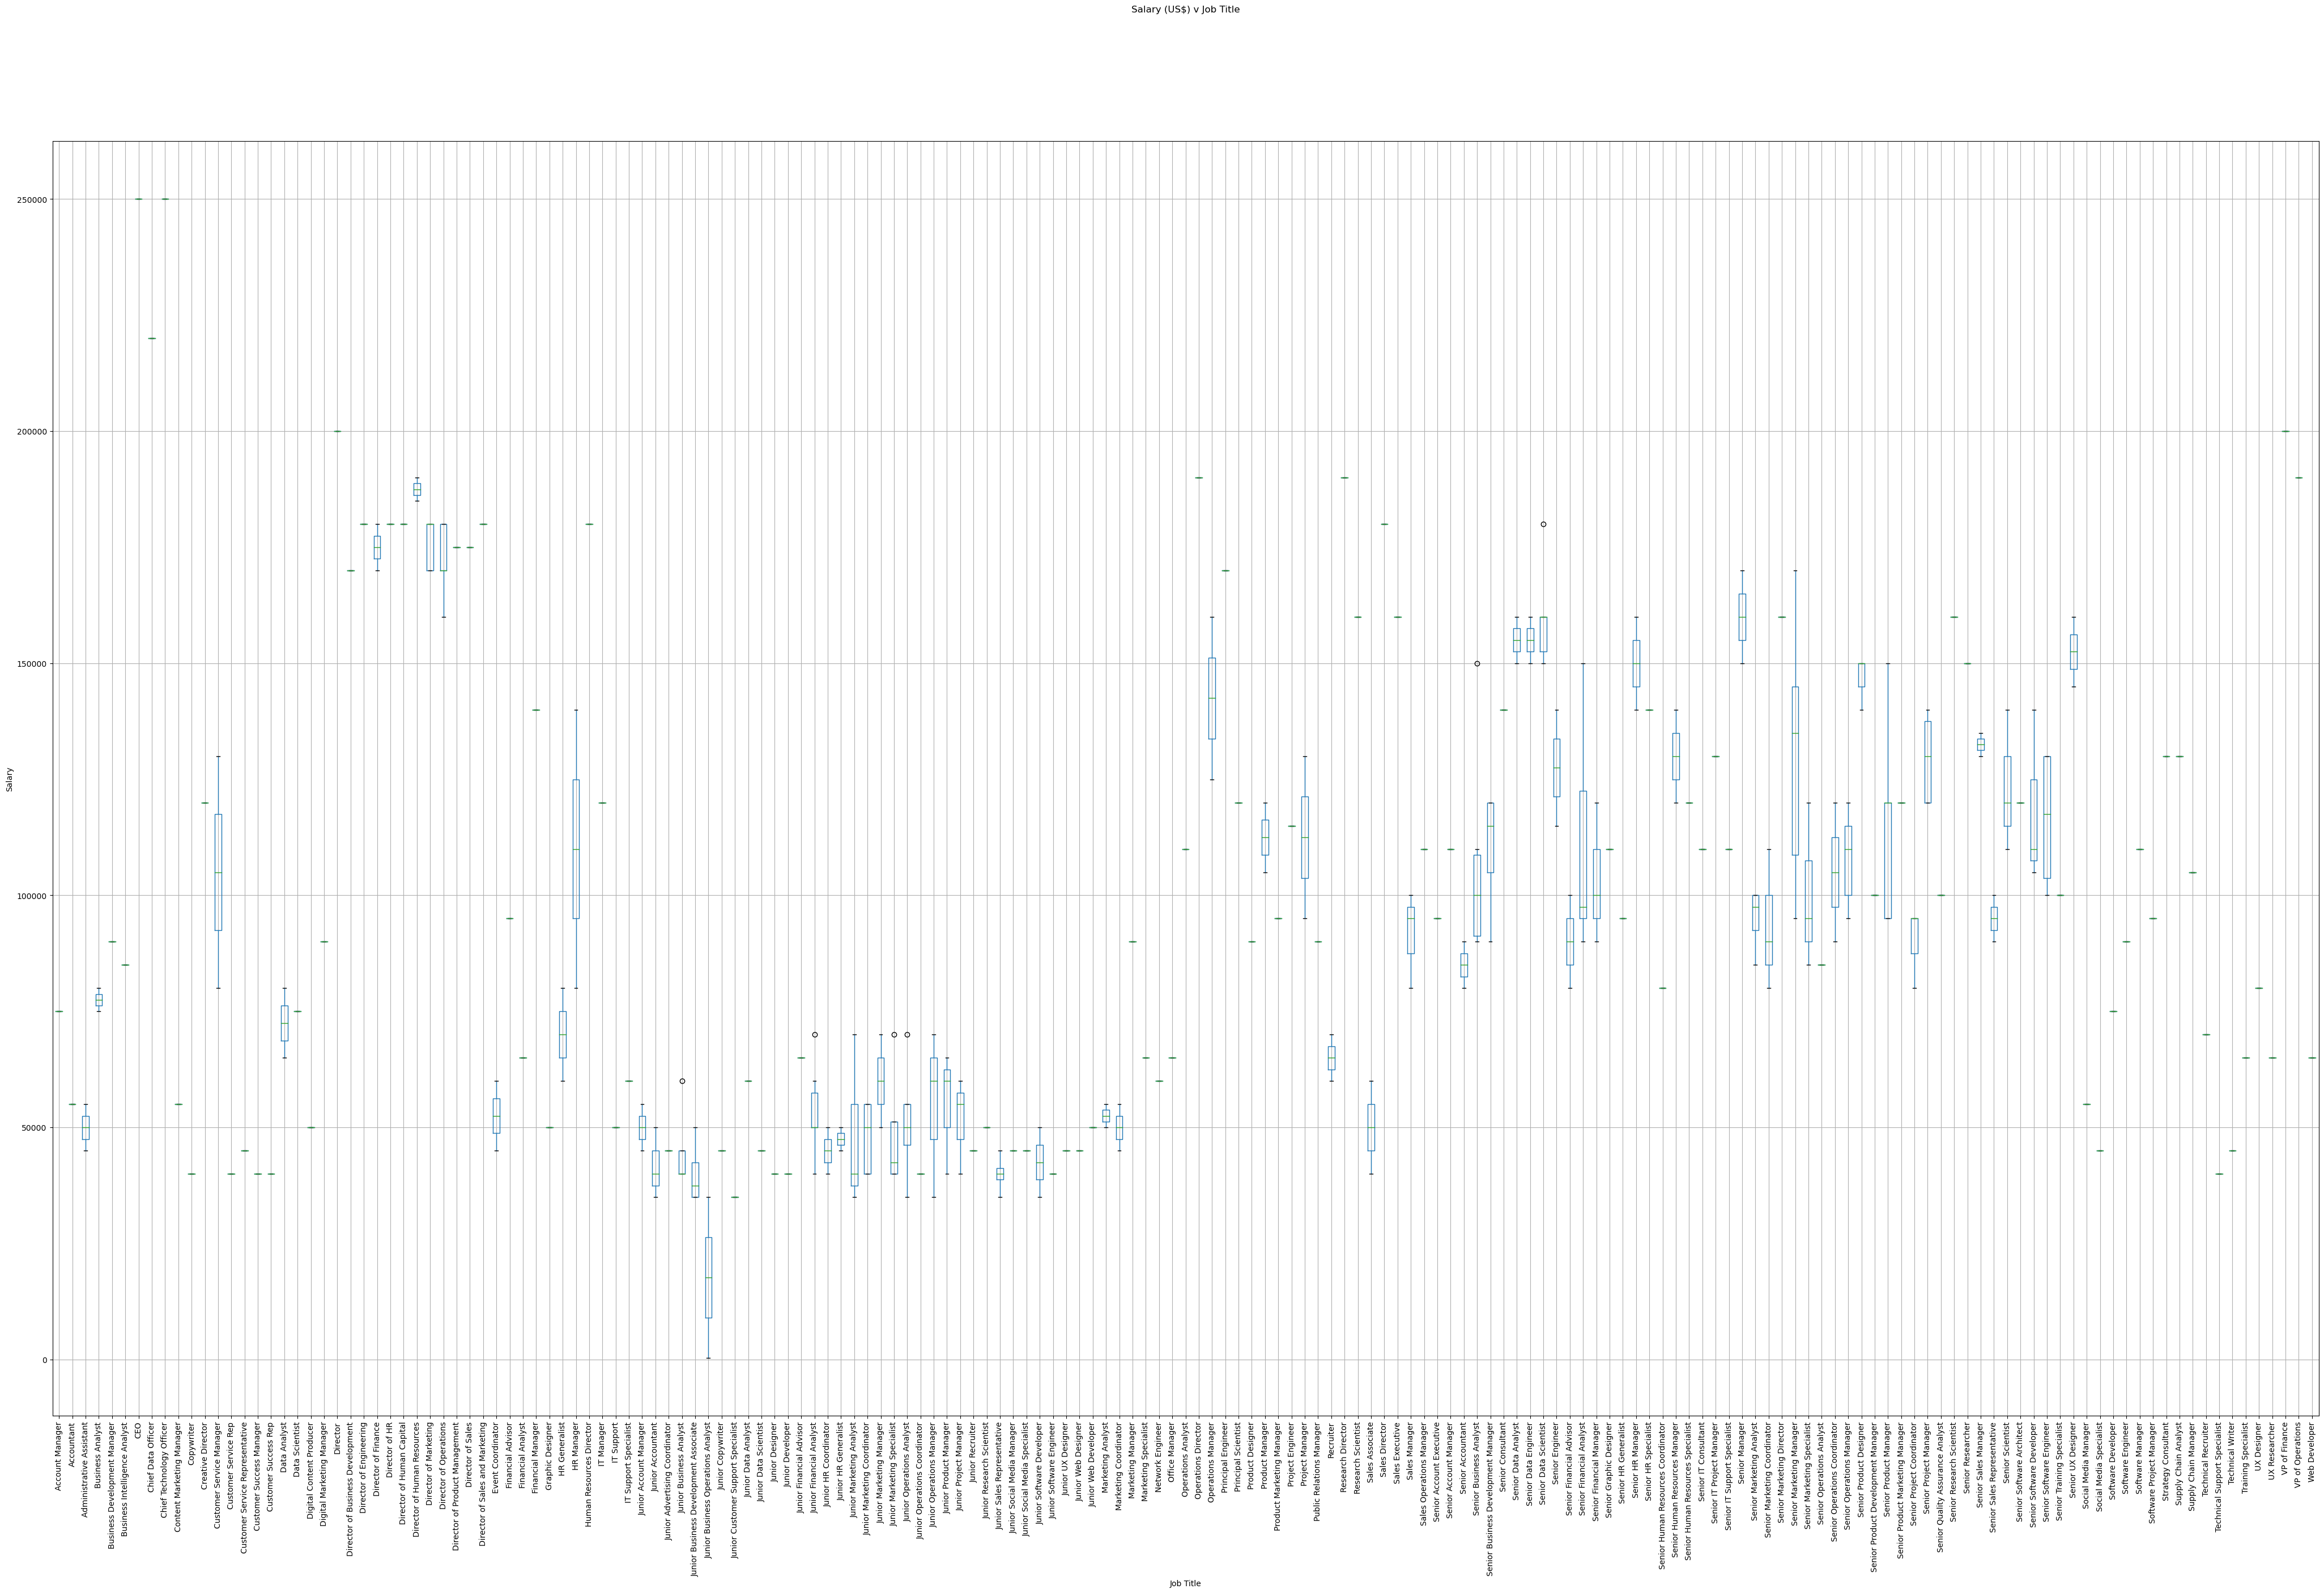

In [105]:
fig, ax = plt.subplots(1,1, figsize=(50,30))
df.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()


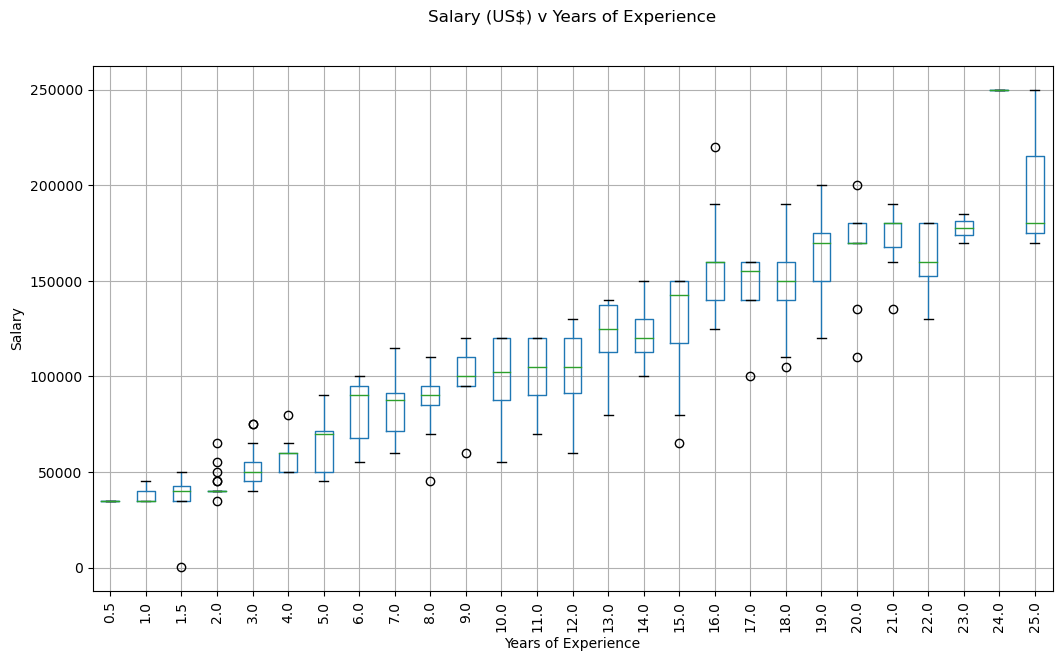

In [102]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Years of Experience', ax=ax)
plt.suptitle('Salary (US$) v Years of Experience')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [115]:
df.shape

(321, 8)

In [113]:
counts = df.nunique()
counts

Age                     31
Gender                   2
Education Level          3
Job Title              171
Years of Experience     27
Salary                  35
ExperienceGroup          5
AgeGroup                 4
dtype: int64

In [119]:
df.drop_duplicates(inplace=True)
df= df.copy()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,ExperienceGroup,AgeGroup
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,0-5,30-39
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0-5,20-29
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,10-15,40-49
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,5-10,30-39
4,52.0,Male,Master's,Director,20.0,200000.0,15-20,50-59
...,...,...,...,...,...,...,...,...
348,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0,0-5,20-29
349,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0,5-10,30-39
350,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0,15-20,40-49
351,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0,0-5,30-39


## Descriptive Statistics

In [16]:
df.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [17]:
df.isna().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [21]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

## Data Visualization

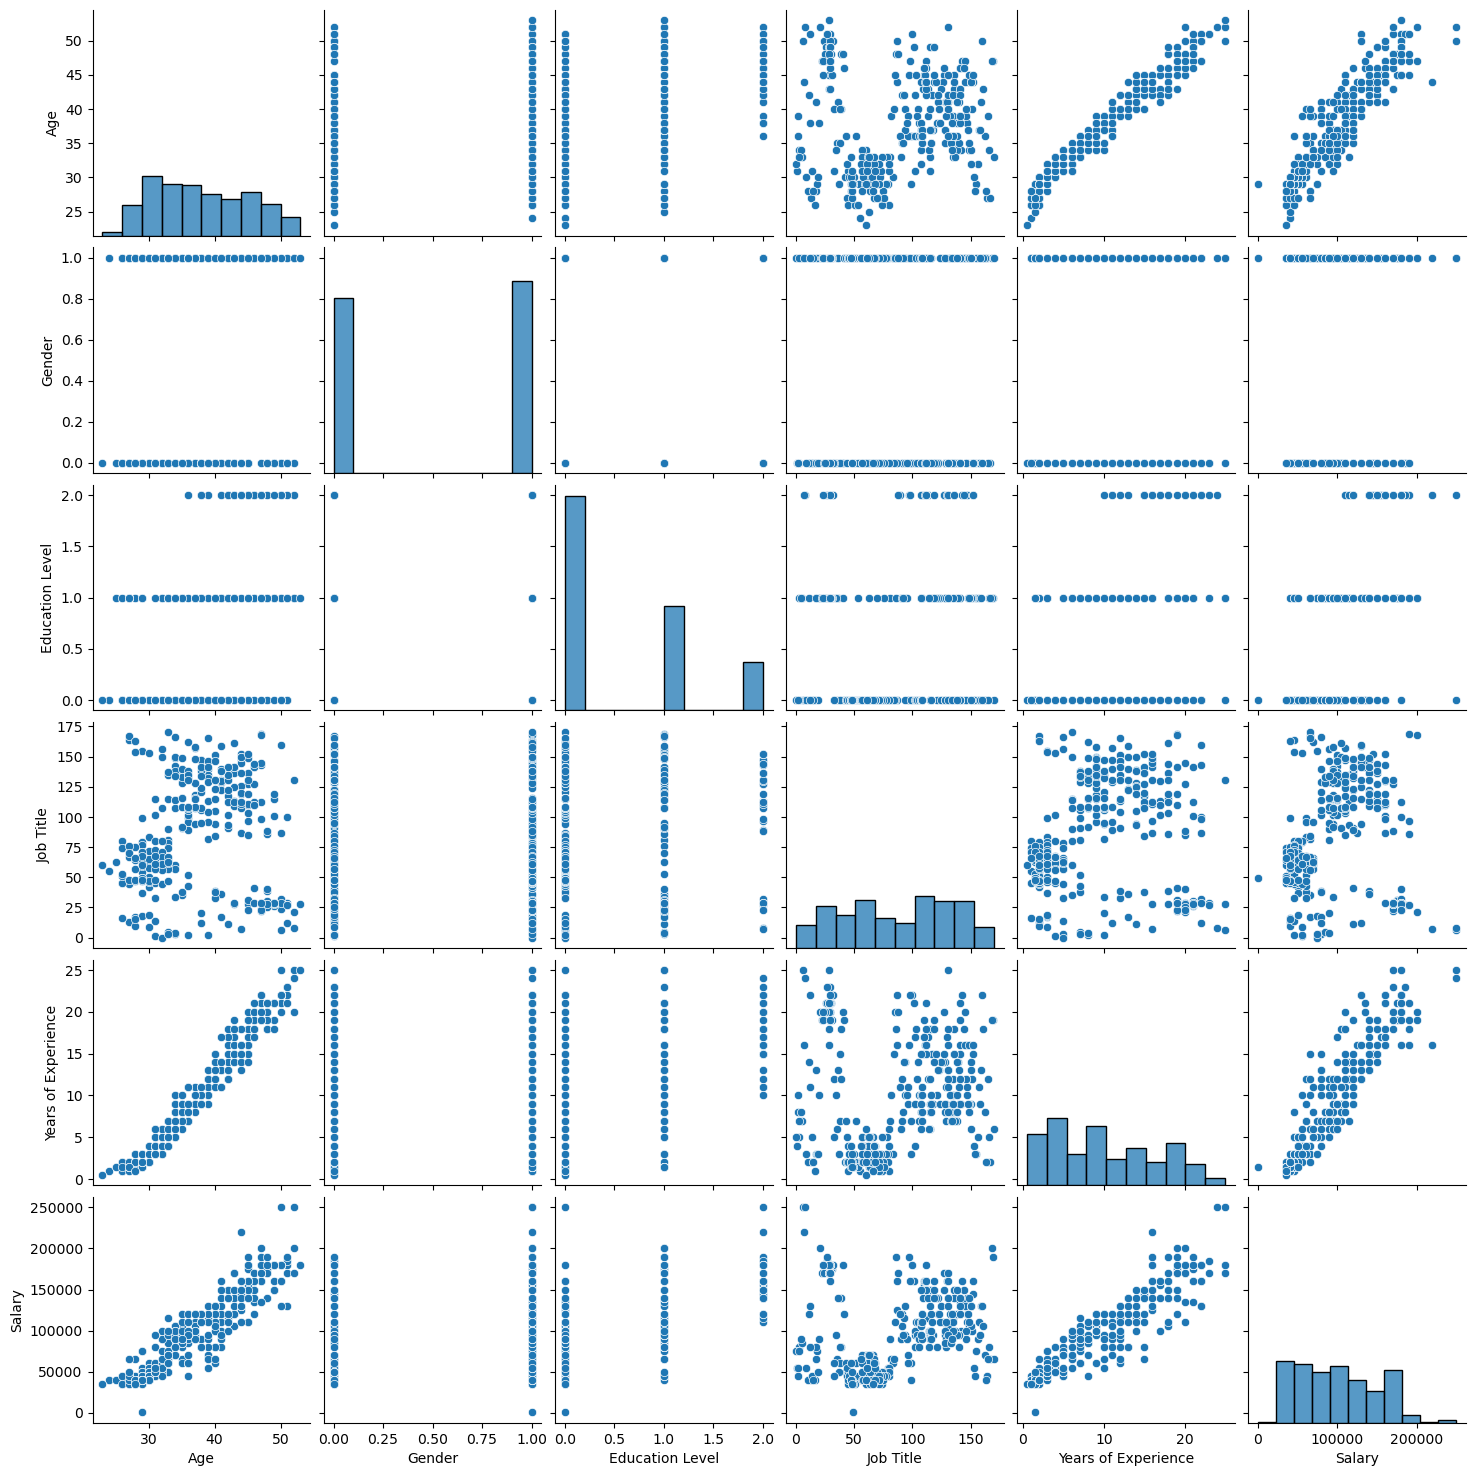

In [169]:
sns.pairplot(df)


## Correlation Analysis

<Axes: >

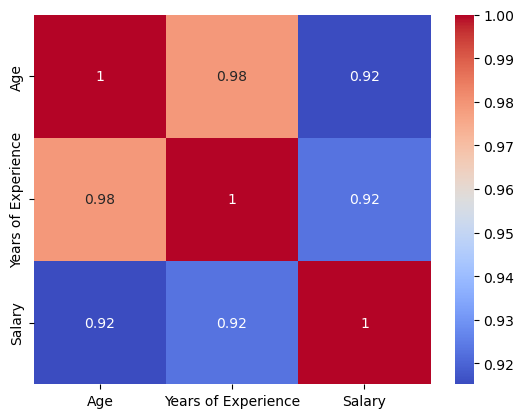

In [146]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

## Analysis

In [164]:
print("Minimum salary: "+ str(df['Salary'].min()))
print("Avg. Salary: "+str(df['Salary'].median()))
print("Maximum Salary: "+str(df['Salary'].max()))
Richer = len(df[df['Salary']>95000])
All = len(df)
rich_percentage = (Richer*100)/All

print("%.2f percentage of people in this dataset earn more than avg."%rich_percentage )


Minimum salary: 350.0
Avg. Salary: 95000.0
Maximum Salary: 250000.0
47.66 percentage of people in this dataset earn more than avg.


The average salary of all employees is: 99985.64814814815


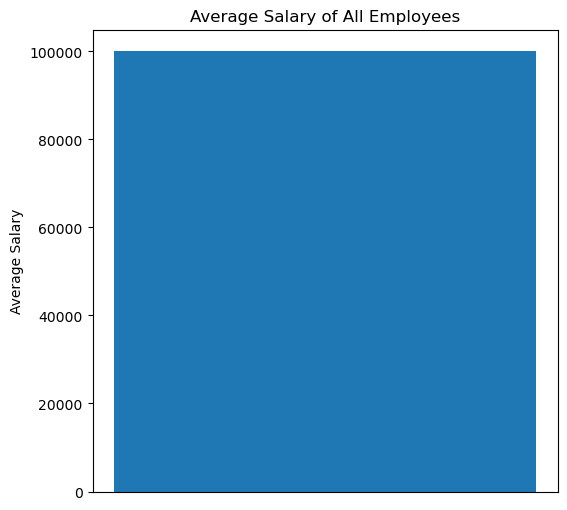

In [28]:
average_salary = df["Salary"].mean()

print("The average salary of all employees is:", average_salary)

plt.figure(figsize=(6, 6))
plt.bar(0, average_salary)
plt.xticks([])
plt.ylabel("Average Salary")
plt.title("Average Salary of All Employees")
plt.show()

In [29]:
# Count the number of male and female employees
male_count = df["Gender"].value_counts()["Male"]
female_count = df["Gender"].value_counts()["Female"]

# Calculate the gender distribution
gender_distribution = {
    "Male": male_count,
    "Female": female_count
}

# Print the gender distribution
print(gender_distribution)

{'Male': 170, 'Female': 154}


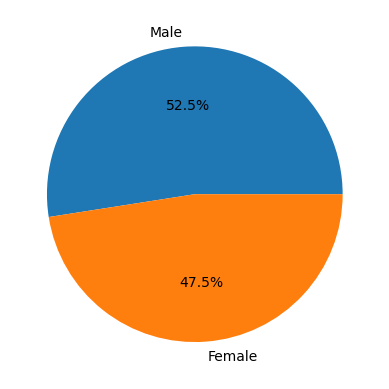

In [32]:
plt.pie(gender_distribution.values(), labels=gender_distribution.keys(), autopct="%1.1f%%")
plt.show()

In [33]:
male_salary = df[df["Gender"] == "Male"]["Salary"].mean()
female_salary = df[df["Gender"] == "Female"]["Salary"].mean()

# Print the mean salary of male and female
print("Mean salary of male:", male_salary)
print("Mean salary of female:", female_salary)

Mean salary of male: 103472.64705882352
Mean salary of female: 96136.36363636363


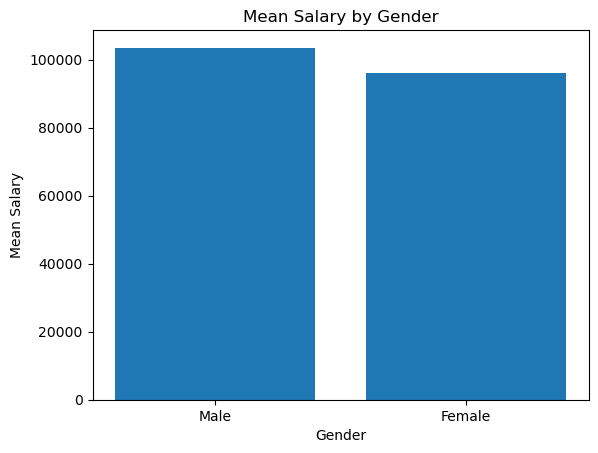

In [34]:
plt.bar(['Male', 'Female'], [male_salary, female_salary])


plt.title('Mean Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Salary')

plt.show()

In [41]:
Job_tiltle_wise_average_salary = df.groupby('Job Title')['Salary'].mean()

print(department_wise_average_salary)

Job Title
Account Manager                  75000.0
Accountant                       55000.0
Administrative Assistant         50000.0
Business Analyst                 77500.0
Business Development Manager     90000.0
                                  ...   
UX Designer                      80000.0
UX Researcher                    65000.0
VP of Finance                   200000.0
VP of Operations                190000.0
Web Developer                    65000.0
Name: Salary, Length: 174, dtype: float64


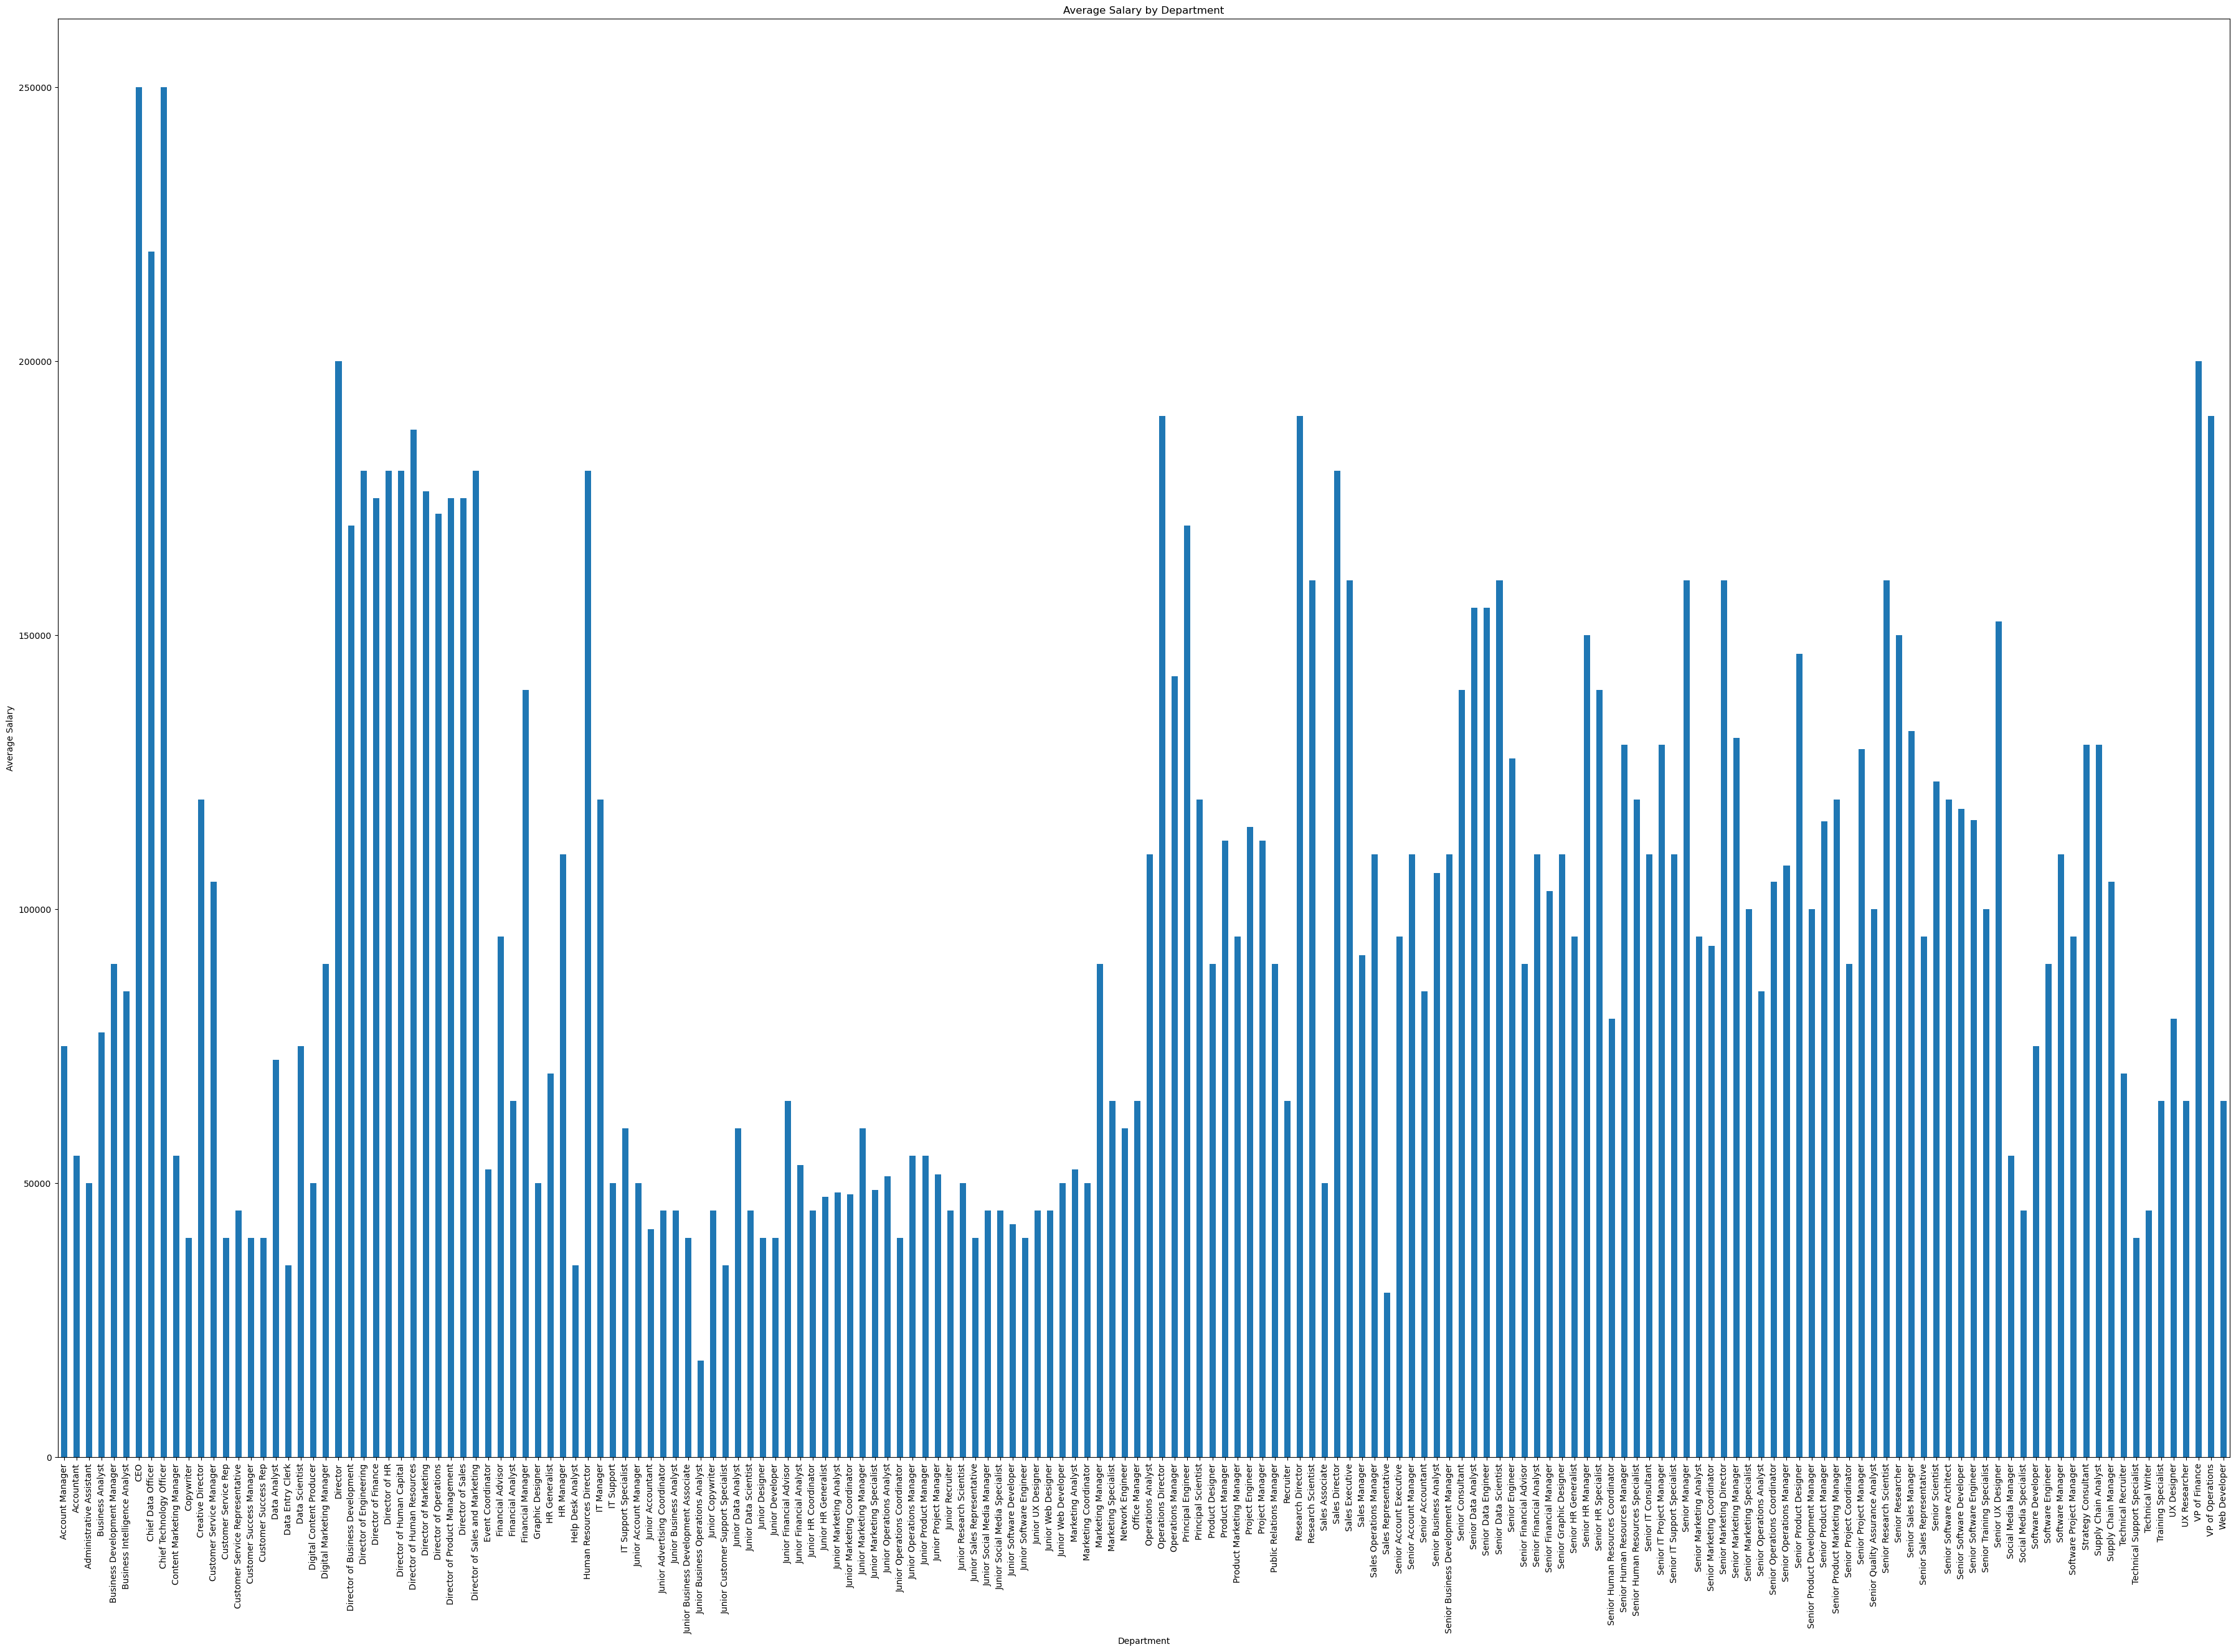

In [247]:
plt.figure(figsize=(45, 30))
Job_tiltle_wise_average_salary.plot(kind='bar')
plt.title("Average Salary by Department")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.xticks(rotation=90)
plt.show()

In [54]:
highest_paying_job_title = Job_tiltle_wise_average_salary.idxmax()

# Print the results
print(f"The job title with the highest average salary is {highest_paying_job_title}.")

The job title with the highest average salary is CEO.


Correlation Coefficient: 0.9244547950798225


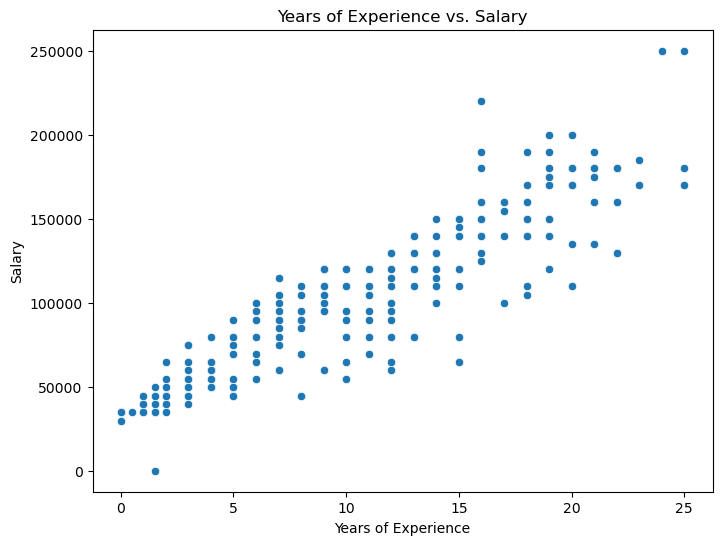

In [65]:
correlation_coefficient = df['Years of Experience'].corr(df['Salary'])
print("Correlation Coefficient:", correlation_coefficient)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary')
plt.title("Years of Experience vs. Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Average Salary Group-wise:
ExperienceGroup
0-5       49330.288462
5-10      92215.189873
10-15    115178.571429
15-20    158684.210526
20+      175400.000000
Name: Salary, dtype: float64


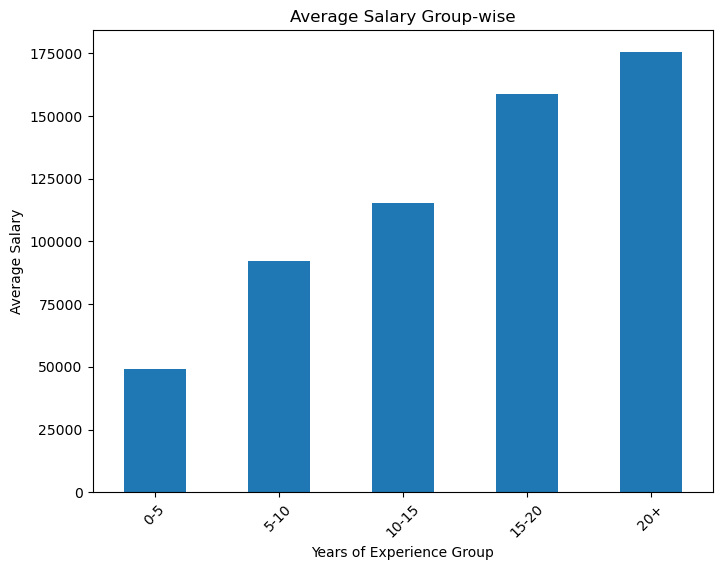

In [75]:
bins = [0, 5, 10, 15, 20, float('inf')]  # Define the bin ranges
labels = ['0-5', '5-10', '10-15', '15-20', '20+']  # Labels for the bins

df['ExperienceGroup'] = pd.cut(df['Years of Experience'], bins=bins, labels=labels)
average_salary_group = df.groupby('ExperienceGroup')['Salary'].mean()

print("Average Salary Group-wise:")
print(average_salary_group)


plt.figure(figsize=(8, 6))
average_salary_group.plot(kind='bar')
plt.title("Average Salary Group-wise")
plt.xlabel("Years of Experience Group")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

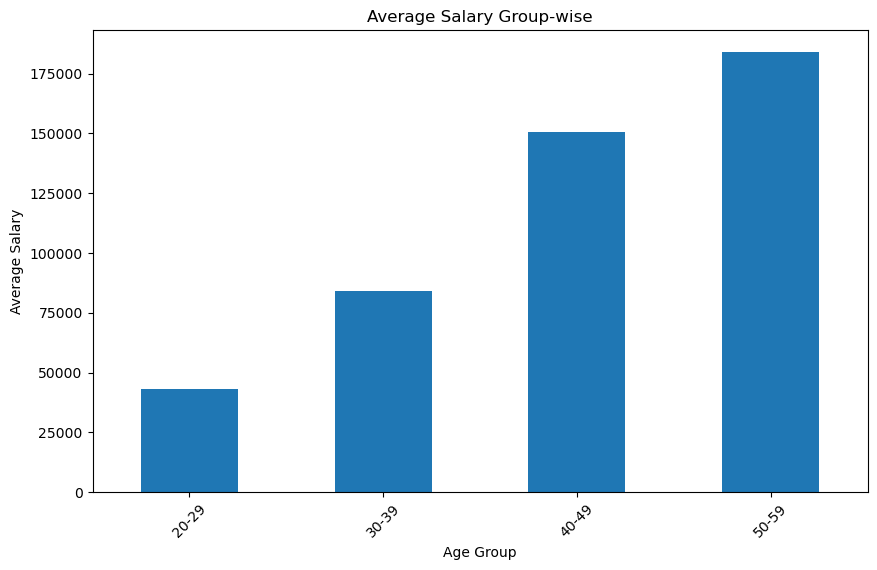

In [88]:

bins = [20, 30, 40, 50, 60]  # Define the bin edges for age groups
labels = ['20-29', '30-39', '40-49', '50-59']  # Labels for the age groups

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


average_salary_group = df.groupby('AgeGroup')['Salary'].mean()


plt.figure(figsize=(10, 6))
average_salary_group.plot(kind='bar')
plt.title("Average Salary Group-wise")
plt.xlabel("Age Group")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

In [89]:
min_mean_salary = average_salary_group.min()
age_group_min_salary = average_salary_group[average_salary_group == min_mean_salary].index


max_mean_salary = average_salary_group.max()
age_group_max_salary = average_salary_group[average_salary_group == max_mean_salary].index

print("Age Group with Minimum Mean Salary:")
print(age_group_min_salary)

print("Age Group with Maximum Mean Salary:")
print(age_group_max_salary)

Age Group with Minimum Mean Salary:
CategoricalIndex(['20-29'], categories=['20-29', '30-39', '40-49', '50-59'], ordered=True, dtype='category', name='AgeGroup')
Age Group with Maximum Mean Salary:
CategoricalIndex(['50-59'], categories=['20-29', '30-39', '40-49', '50-59'], ordered=True, dtype='category', name='AgeGroup')


In [92]:
age_job_max_salary = df.groupby(['AgeGroup', 'Job Title'])['Salary'].max()

# Step 4: Finding Age Group and Job Title with Highest Maximum Salary
max_salary = age_job_max_salary.max()
age_job_highest_salary = age_job_max_salary[age_job_max_salary == max_salary].idxmax()

age_group_highest_salary = age_job_highest_salary[0]
job_title_highest_salary = age_job_highest_salary[1]

print("Age Group and Job Title with the Highest Maximum Salary:")
print("Age Group:", age_group_highest_salary)
print("Job Title:", job_title_highest_salary)

Age Group and Job Title with the Highest Maximum Salary:
Age Group: 40-49
Job Title: CEO


In [121]:
education_mean_salary = df.groupby('Education Level')['Salary'].mean()

# Step 4: Finding Education Level with the Highest Mean Salary
highest_mean_salary = education_mean_salary.max()
highest_education_level = education_mean_salary[education_mean_salary == highest_mean_salary].index

print("Education Level with the Highest Mean Salary:")
print(highest_education_level)

Education Level with the Highest Mean Salary:
Index(['PhD'], dtype='object', name='Education Level')


<Axes: xlabel='Salary', ylabel='Density'>

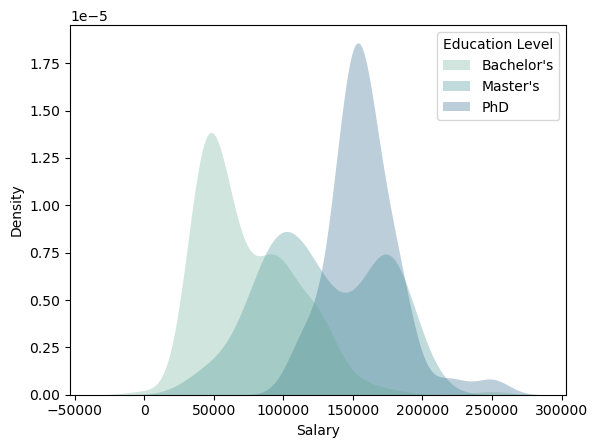

In [131]:
sns.kdeplot(
   data=df, x="Salary", hue="Education Level",
   fill=True, common_norm=False, palette="crest",
   alpha=.3, linewidth=0,
)

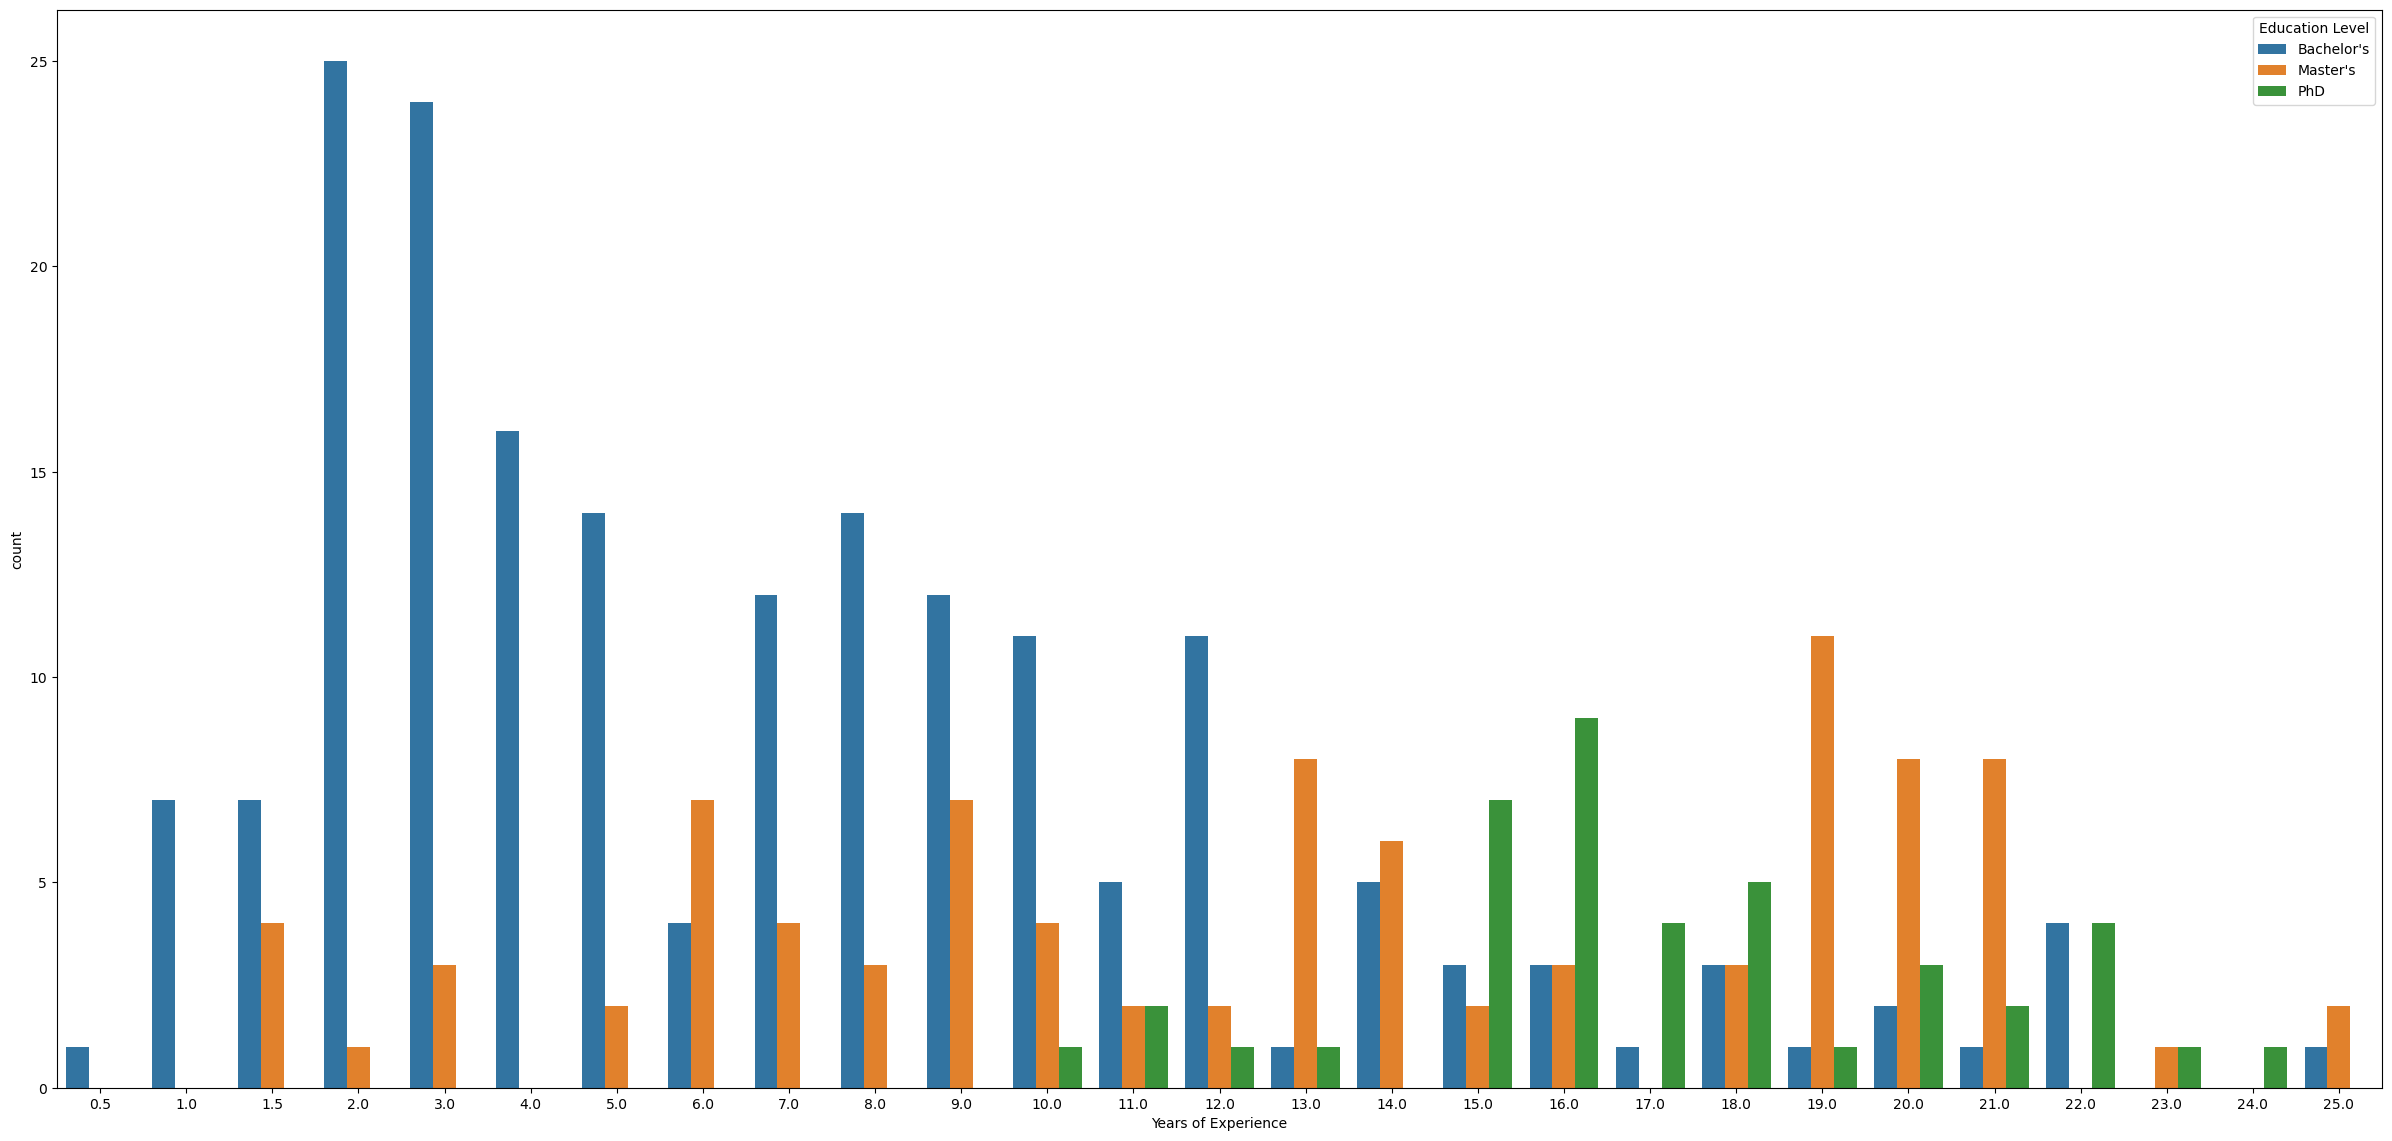

In [129]:
plt.figure(figsize=(30,14))
sns.countplot(data =df, x = 'Years of Experience', hue = 'Education Level')
plt.show()

## ML MODEL: Linear Regression

In [178]:
x = df["Age"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [180]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

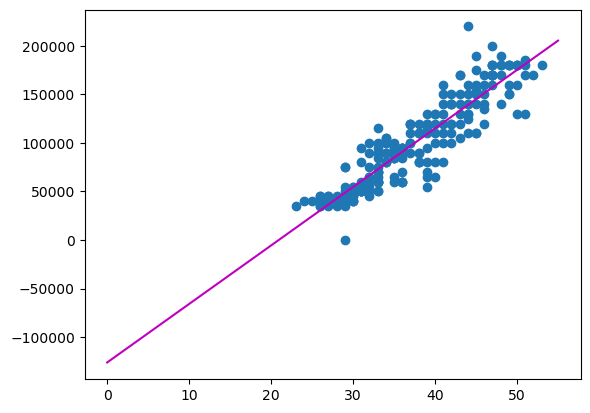

In [181]:

plt.scatter(x_train,y_train)
plt.plot(np.linspace(0,55).reshape(-1,1),reg.predict(np.linspace(0,55).reshape(-1,1)),'m')
plt.show()


In [183]:
y_pred = reg.predict(x_test)

In [185]:

import statsmodels.api as sm
import statsmodels.formula.api as smf

linear_model = smf.ols('Salary ~ Age',data = df).fit()

In [186]:
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1646.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          5.78e-128
Time:                        18:27:42   Log-Likelihood:                -3626.2
No. Observations:                 321   AIC:                             7256.
Df Residuals:                     319   BIC:                             7264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.33e+05   5860.365    -22.690      0.0

eval_env: 1


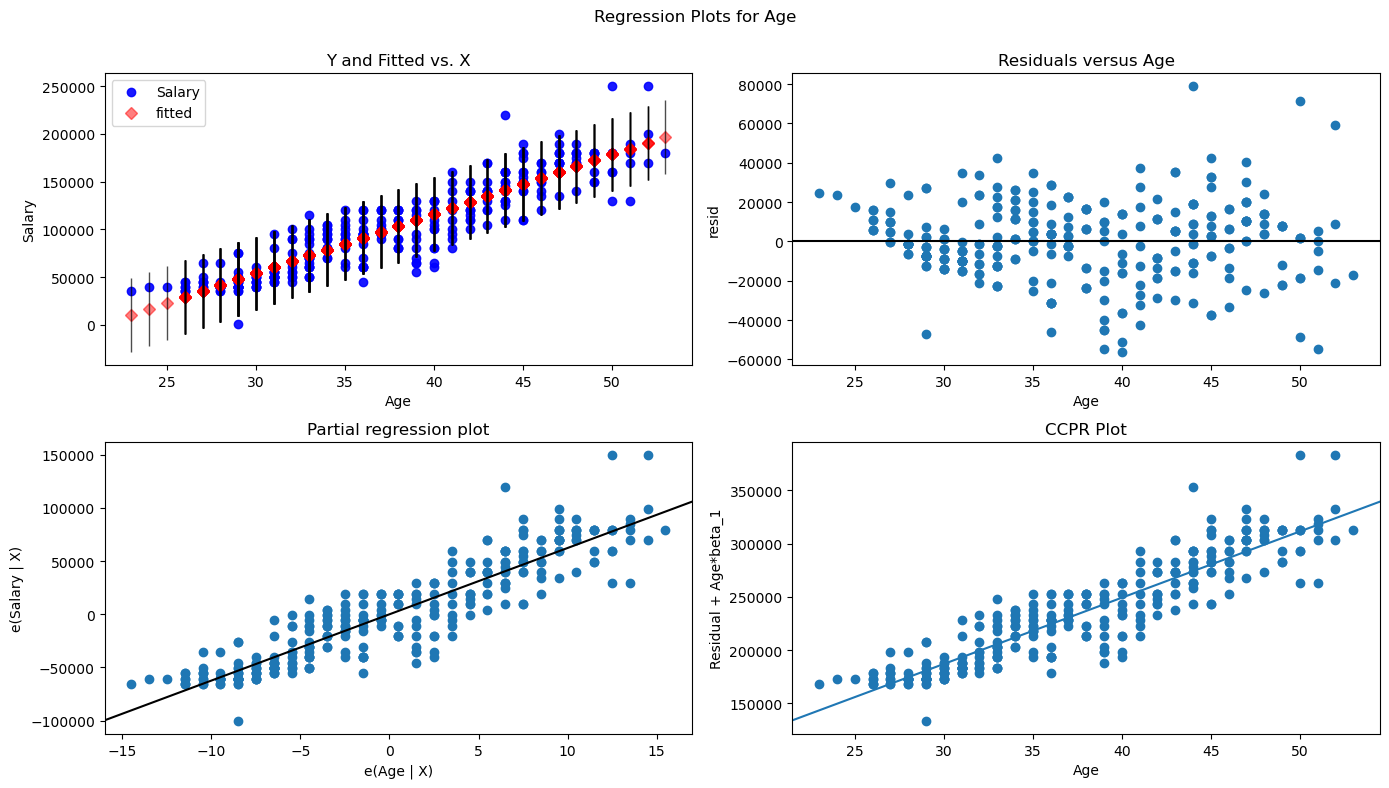

In [188]:
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(linear_model,'Age',fig=fig)

In [189]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.8378339350841502

In [190]:
reg.score(x_train,y_train)

0.8355893672967138

In [191]:
reg.score(x_test,y_test)

0.8378339350841502

In [192]:
reg.coef_

array([[6028.69130712]])

In [193]:
reg.intercept_

array([-126147.94882283])

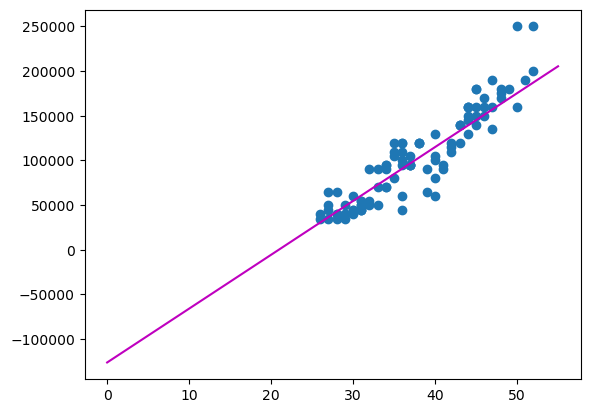

In [194]:
plt.scatter(x_test,y_test)
plt.plot(np.linspace(0,55).reshape(-1,1),reg.predict(np.linspace(0,55).reshape(-1,1)),'m')
plt.show()

In [227]:
df2 = df.rename(columns = { 'Years of Experience' : 'Experience'})
x1 = df2["Experience"].values.reshape(-1,1)
y1 = df2["Salary"].values.reshape(-1,1)

In [214]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3)

In [215]:
reg1 = LinearRegression()
reg1.fit(x1_train,y1_train)

LinearRegression()

In [216]:
y1_predict = reg1.predict(x1_test) 


In [217]:
r2_score(y1_test,y1_predict)

0.8016644720892658

In [218]:
r2_score(y1_predict,y1_test)

0.7485036318679551

In [219]:
reg1.score(x1_test,y1_test)

0.8016644720892658

In [220]:
reg1.score(x1_train,y1_train)

0.8761383117162764

In [221]:
reg1.coef_

array([[6754.19893177]])

In [222]:
reg1.intercept_

array([32399.43149036])

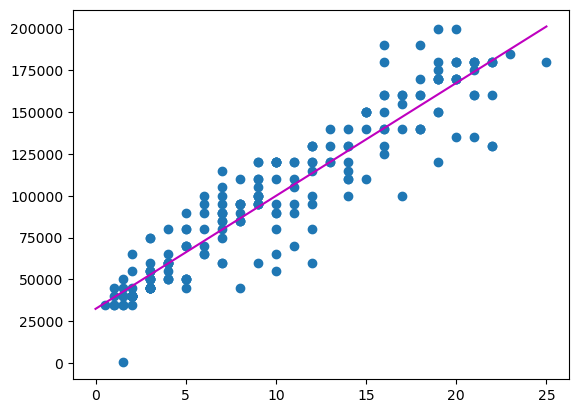

In [223]:
plt.scatter(x1_train,y1_train)
plt.plot(np.linspace(0,25).reshape(-1,1),reg1.predict(np.linspace(0,25).reshape(-1,1)),'m')
plt.show()

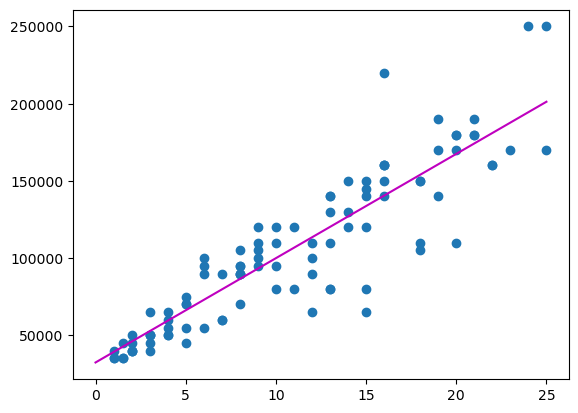

In [224]:
plt.scatter(x1_test,y1_test)
plt.plot(np.linspace(0,25).reshape(-1,1),reg1.predict(np.linspace(0,25).reshape(-1,1)),'m')
plt.show()

In [231]:
linear_model_new = smf.ols('Salary ~ Experience',data = df2).fit()
print(linear_model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1837.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          2.10e-134
Time:                        18:38:02   Log-Likelihood:                -3611.3
No. Observations:                 321   AIC:                             7227.
Df Residuals:                     319   BIC:                             7234.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.192e+04   1911.534     16.697      0.0

eval_env: 1


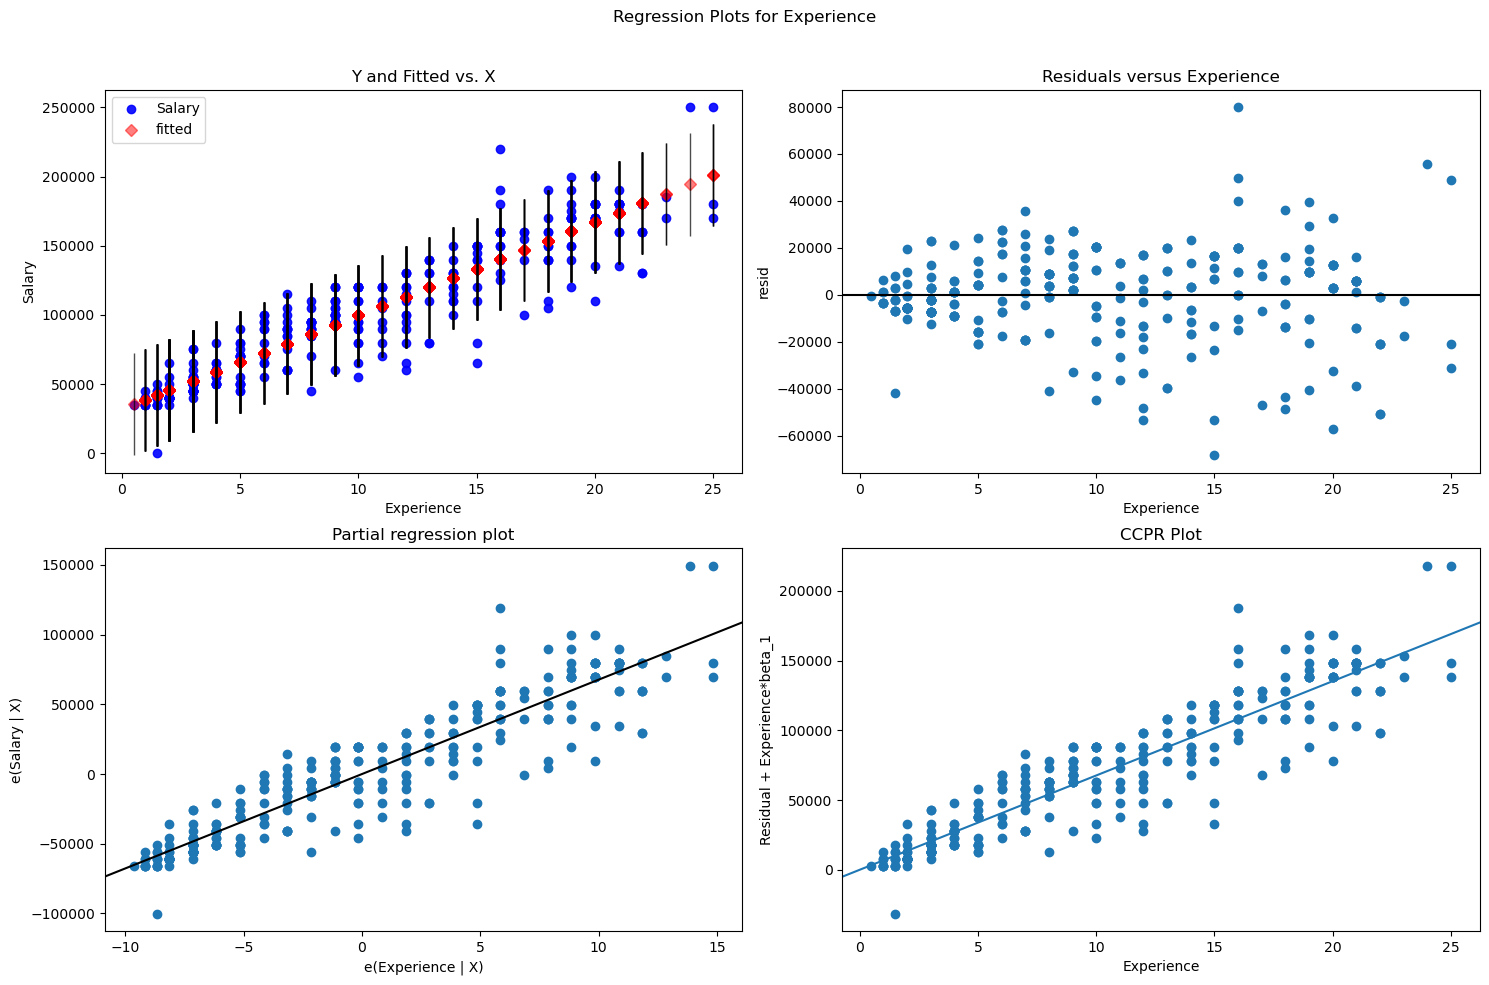

In [232]:
fig1 = plt.figure(figsize=(15,10))
fig1 = sm.graphics.plot_regress_exog(linear_model_new,'Experience',fig = fig1)

In [233]:
from sklearn.model_selection import cross_val_score 
MSE = cross_val_score(reg1,x1_train,y1_train,scoring='neg_mean_squared_error',cv=5)
print(MSE)

[-2.72251175e+08 -2.33147901e+08 -3.69059792e+08 -2.91969309e+08
 -2.44445940e+08]


In [234]:
np.mean(MSE)

-282174823.436696

In [235]:
x2 = df2[["Age","Experience"]].values.reshape(-1,1)
y2 = df2["Salary"].values.reshape(-1,1)

In [236]:
x2_train= x2[:100]
x2_test= x2[100:]
y2_train=y2[:100]
y2_test=y2[100:]

In [237]:
reg3 = LinearRegression()
reg3.fit(x2_train,y2_train)

LinearRegression()

In [238]:
y3_predict = reg3.predict(x2_test)

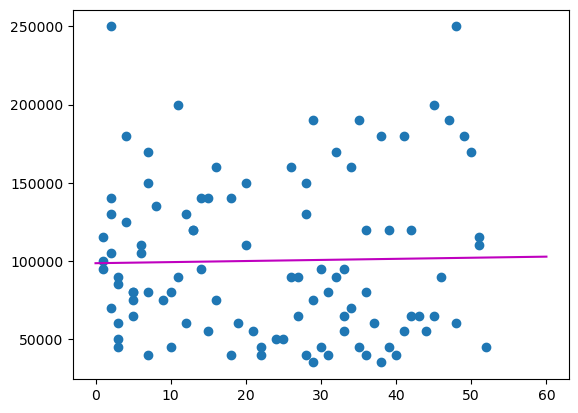

In [239]:
plt.scatter(x2_train,y2_train)
plt.plot(np.linspace(0,60).reshape(-1,1),reg3.predict(np.linspace(0,60).reshape(-1,1)),'m')
plt.show()

In [241]:
linear_regression_multiple = smf.ols('Salary ~ Age+Experience',data = df2).fit()

eval_env: 1
eval_env: 1


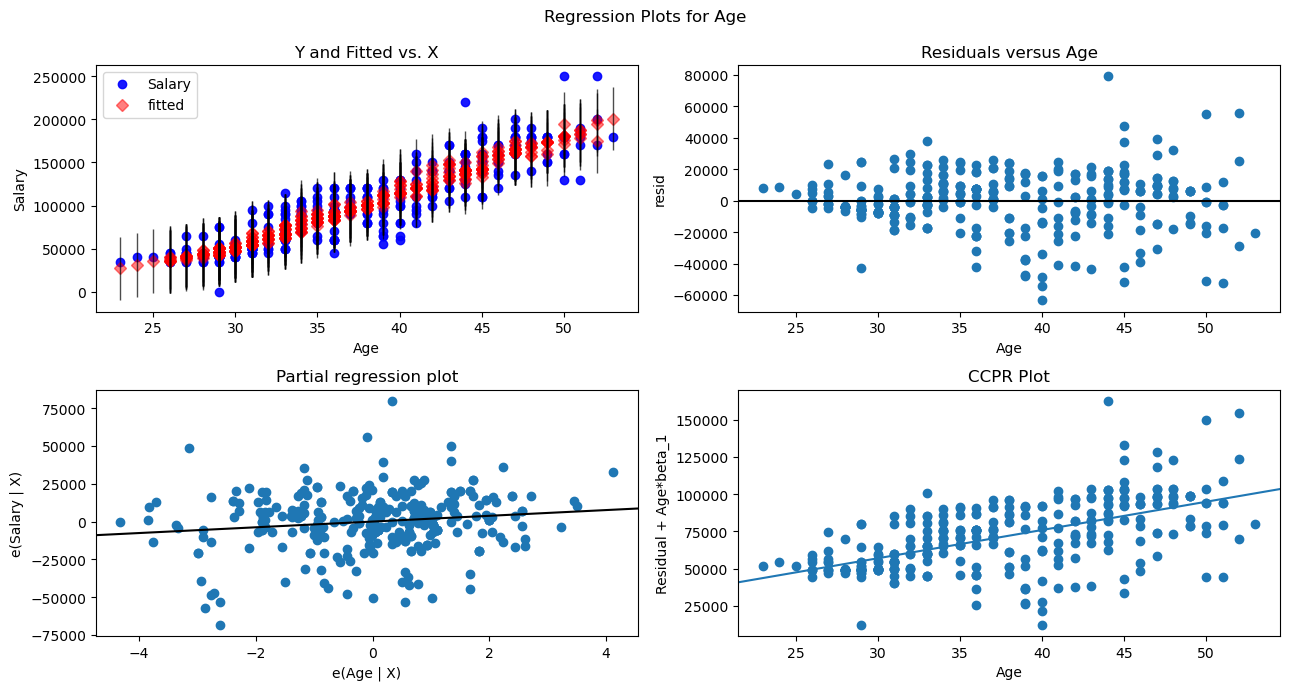

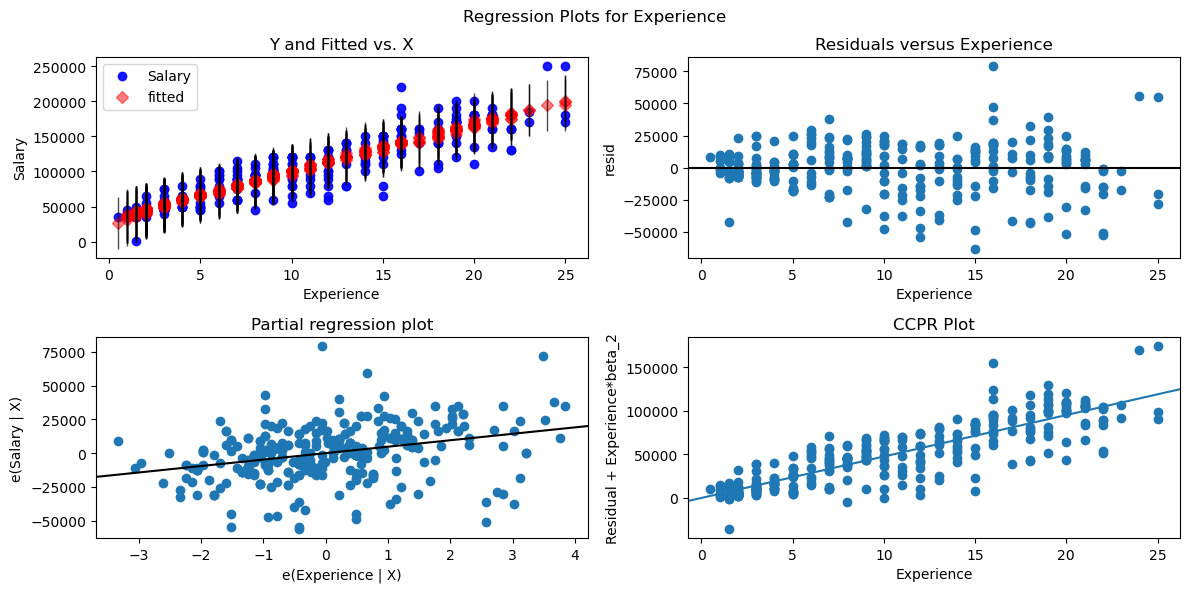

In [242]:
fig2 = plt.figure(figsize=(13,7))
fig2 = sm.graphics.plot_regress_exog(linear_regression_multiple,'Age',fig=fig2)
fig3 = plt.figure(figsize=(12,6))                                     
fig3 = sm.graphics.plot_regress_exog(linear_regression_multiple,'Experience',fig=fig3) 

In [243]:
MSE2 = cross_val_score(reg3,x2_train,y2_train,scoring="neg_mean_squared_error",cv=6)

In [248]:
MSE2

array([-1.77475295e+09, -3.92797036e+09, -2.38174082e+09, -2.52411181e+09,
       -4.16810418e+09, -1.89797954e+09])

In [245]:
np.mean(MSE2)

-2779109943.0979724

In [246]:
print(linear_regression_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     939.8
Date:                Fri, 02 Jun 2023   Prob (F-statistic):          3.30e-134
Time:                        18:41:41   Log-Likelihood:                -3607.8
No. Observations:                 321   AIC:                             7222.
Df Residuals:                     318   BIC:                             7233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.895e+04   1.91e+04     -0.991      0.3